## Multihead Attention

In [2]:
import torch.nn as nn
class MultiHeadAttentionWrapper(nn.Module):
    def __init__(self, d_in, d_out, context_length,
                 dropout, num_heads, qkv_bias=False):
        super().__init__()
        self.heads = nn.ModuleList(
            [CausalAttention(
                 d_in, d_out, context_length, dropout, qkv_bias
             ) 
             for _ in range(num_heads)]
        )

    def forward(self, x):
        return torch.cat([head(x) for head in self.heads], dim=-1)


For example, if we use this MultiHeadAttentionWrapper class with two attention heads (via num_heads=2) and CausalAttention output dimension d_out=2, we get a four-dimensional context vector (d_out*num_heads=4), as depicted in figure   


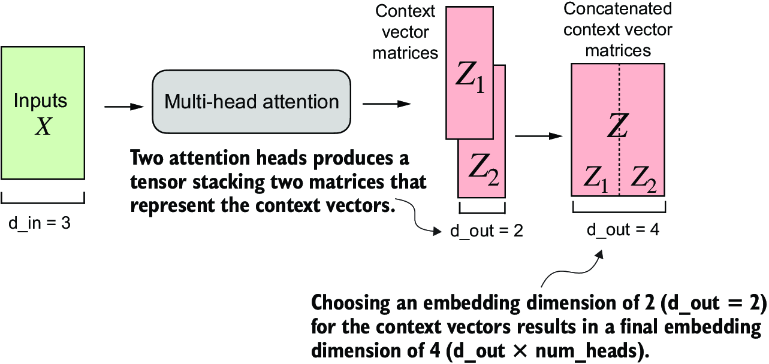